In [2]:
#IMPORT
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
from scipy import stats
import pickle
import gzip
import matplotlib.ticker as ticker
from scipy import stats

import sys
from pathlib import Path

current_dir = Path().resolve()

src_path = current_dir.parent / "src"

# Add to sys.path
sys.path.append(str(src_path))

from functions_simulator import *
from functions import *
import Utils as fx

# Get colors from colormaps
color1 = 'tab:blue' 

colors_viridis = cm.viridis(np.arange(500))

In [3]:
import matplotlib.cm as cm
Set1 = cm.get_cmap('Set1')
colors = [Set1(2),Set1(1),Set1(0)]

/var/folders/8j/xj5x54bs757dw9vt37nb69l40000gn/T/ipykernel_8570/3573412857.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  Set1 = cm.get_cmap('Set1')


In [4]:
Gs=np.linspace(0.,0.21,16)
nG=len(Gs)

In [5]:
Cortical_labels=np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86, 87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103])
Working_labels=Cortical_labels

In [6]:
cortex_ids=[]
for i in range(len(Working_labels)):
    if Working_labels[i] in Cortical_labels:
        cortex_ids.append(i)

In [7]:
PATHS=['Gscan_connectome_sub','Gscan_connectome_crit','Gscan_connectome_super']

In [8]:
case=['Subcritical','Critical','Supercritical']

In [16]:
# This folder contains the simulations saved in the notebook number 5
path_data_simulated = 'my_out_folder/Gscan_connectome_super/' #'/Volumes/LaCie2/fufo/data/Interim/Bozzo/2025/'#

# Global Raster

In [9]:
Gip=0

gadd=[15,2, 5]

tlen=17000
tmax=12000+tlen

Ri=np.zeros((3, tmax-tlen, len(Cortical_labels)))

for idat, dat in enumerate(PATHS):
    print(idat)
    for iG in [Gip]:
        with open(path_data_simulated + dat + '/data_G%d.pkl' % (iG+gadd[idat]), 'rb') as f:
            DATA = pickle.load(f)
            
        # Extract timeseries
        Ri[idat,:,:] = DATA['R'][tlen:tmax, cortex_ids]  # Kuramoto parameter timeseries
        
        #kuramoto_order = np.mean(stats.zscore(R),axis=1) 

0
1
2


In [10]:
timez=np.linspace(0,tmax-tlen,5)

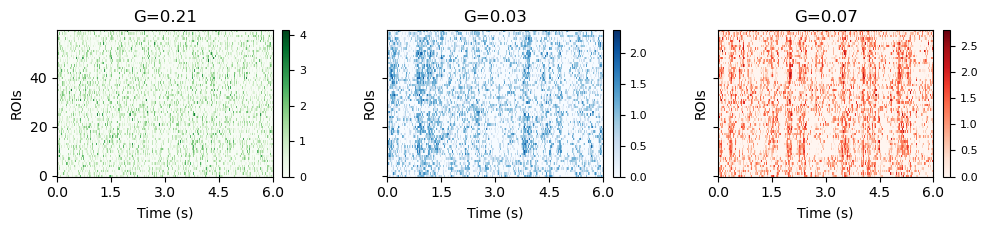

In [11]:
# colormaps and subplot setup
colormaps = ['Greens', 'Blues', 'Reds']
fig, axes = plt.subplots(1, 3, figsize=(10, 2.4), sharey=True)

for i in range(3):
    im = axes[i].imshow(
        stats.zscore(Ri[i]).T,  # Z-score normalize across all values
        aspect='auto',
        origin='lower',
        cmap=colormaps[i],
        vmin=0, interpolation='nearest'
    )
    axes[i].set_title(r'G=%.2f'%Gs[Gip+gadd[i]])#(f"{case[i]}")
    axes[i].set_xlabel("Time (s)")
    axes[i].set_xticks(timez)
    axes[i].set_xticklabels(timez/2000)

    axes[i].set_ylabel("ROIs")

    #if i == 0:
    #    axes[i].set_ylabel("ROIs")
    #    axes[i].set_yticks(np.arange(len(Cortical_labels)))
    #    axes[i].set_yticklabels(Cortical_labels)
    #else:
    #    axes[i].set_yticks([])

    # Add colorbar for each subplot
    cbar = fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
#plt.savefig('../figures/Fig4/Rasters.pdf', transparent=True, dpi=300)
plt.show()


# Global R

In [23]:
Set1 = cm.get_cmap('Set1')
colors = [Set1(2),Set1(1),Set1(0)]

/var/folders/8j/xj5x54bs757dw9vt37nb69l40000gn/T/ipykernel_8570/2351399974.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  Set1 = cm.get_cmap('Set1')


In [24]:
tlen=17000
tmax=12000+tlen


GGs = [0, 2, 5, 15]
kuramoto_order=np.zeros((3, len(GGs), tmax-tlen))

for idat, dat in enumerate(PATHS):
    print(idat)
    for iG,gg in enumerate(GGs):
        with open(path_data_simulated + dat + '/data_G%d.pkl' % gg, 'rb') as f:
            DATA = pickle.load(f)
            
        # Extract timeseries
        R = DATA['R'][tlen:tmax, cortex_ids]  # Kuramoto parameter timeseries
        
        kuramoto_order[idat,iG,:] = np.mean(stats.zscore(R),axis=1) 

0
1
2


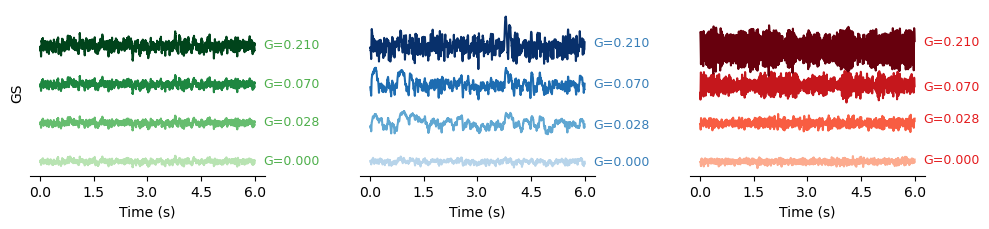

In [25]:
timez=np.linspace(0,tmax-tlen,5)
nz=3

# Parameters
GGs = [0, 2, 5, 15]
Gs_labels = [f'G=%.3f'%Gs[g] for g in GGs]  # Labels like G=0.0, G=0.3, ...

colormaps = ['Greens', 'Blues', 'Reds']

fig, axes = plt.subplots(1, 3, figsize=(10, 2.4), sharey=True)

for i in range(3):  # 3 PATHS / datasets
    for spine in ['top', 'right', 'left']:
        axes[i].spines[spine].set_visible(False)

    n_colors = len(GGs)
    cmap = plt.get_cmap(colormaps[i])
    # Avoid lightest colors by sampling from 0.3 to 1.0
    shades = [cmap(0.3 + 0.7 * j / (n_colors - 1)) for j in range(n_colors)]

    for j, g in enumerate(GGs):
        y_values = kuramoto_order[i, j]+nz*j
        axes[i].plot(
            np.arange(tmax - tlen),  # x-axis is time steps
            y_values,
            color=shades[j],
            label=Gs_labels[j]
        )
    

    #axes[i].set_title(f"{case[i]}")
    axes[i].set_xlabel("Time (s)")
    axes[i].set_xticks(timez)
    axes[i].set_yticks([])
    axes[i].set_xticklabels(timez/2000)

    if i == 0:
       axes[i].set_ylabel("GS")

    # Add inline labels at the end of each line
    for j, g in enumerate(GGs):
        y_values = kuramoto_order[i, j]
        axes[i].text(
            (tmax - tlen) + 500,  # slight offset to the right  -3500
            y_values[-1]+nz*j,
            Gs_labels[j],
            color=colors[i],
            fontsize=9,
            va='center'
        )

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
#plt.savefig('GSs.pdf', transparent=True, dpi=300)
plt.show()


# Global Powerlaws

In [15]:
tlen=5000

GGs = [0, 2, 4, 6, 8]
SS={}

for idat, dat in enumerate(PATHS):
    print(idat)
    SS[idat]={}
    for iG,gg in enumerate(GGs):
        with open(path_data_simulated + dat + '/data_G%d.pkl' % gg, 'rb') as f:
            DATA = pickle.load(f)
            
        # Extract timeseries
        R = DATA['R'][tlen:, cortex_ids]  # Kuramoto parameter timeseries
        kuramoto=np.mean(stats.zscore(R),axis=1)
        SS[idat][iG], dur = measure_events(kuramoto,np.median(kuramoto),dir=1) 

0
1
2


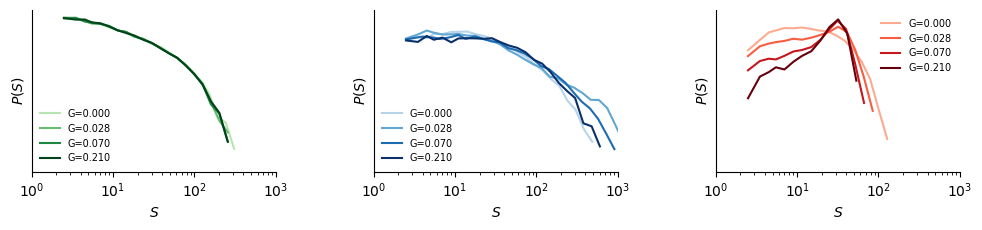

In [17]:
import numpy as np
import matplotlib.pyplot as plt

GGs = [0, 2, 5, 15]
Gs_labels = [f'G=%.3f'%Gs[g] for g in GGs]  # Labels like G=0.0, G=0.3, ...

fig, axes = plt.subplots(1, 3, figsize=(10, 2.4), sharey=True)

colormaps = ['Greens', 'Blues', 'Reds']
x_min, x_max = 1e0, 1e3  # Common x-limits

for i in range(3):
    for spine in ['top', 'right']:
        axes[i].spines[spine].set_visible(False)

    cmap = plt.get_cmap(colormaps[i])
    n_colors = len(GGs)

    # Avoid lightest colors by sampling from 0.3 to 1.0
    shades = [cmap(0.3 + 0.7 * j / (n_colors - 1)) for j in range(n_colors)]

    for j, g in enumerate(GGs):
        fx.plot_pdf(SS[i][j], ax=axes[i], color=shades[j], label=Gs_labels[j])

    #axes[i].set_title(f"{case[i]}")
    axes[i].set_xlabel(r"$S$")
    axes[i].set_yscale("log")
    axes[i].set_xscale("log")
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_yticks([])

    #if i == 0:
    axes[i].set_ylabel(r"$P(S)$")

    axes[i].legend(fontsize=7, frameon=False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
#plt.savefig('../figures/Fig4/Sizes_Powerlaw.pdf', transparent=True, dpi=300)
plt.show()


# Global AC1 (autocorrelation at lag 1ms for the simulated global signal)

In [26]:
global_connectivity_ids=np.arange(16)

# Your loop with retry mechanism
tlen=5000

DEL=[20]

AC1_global=np.zeros((3,len(DEL),len(global_connectivity_ids)))

for idat, dat in enumerate(PATHS):
    print(idat)
    for iG in global_connectivity_ids:
        with open(path_data_simulated + dat + '/data_G%d.pkl' % iG, 'rb') as f:
            DATA = pickle.load(f)
            
        # Extract timeseries
        R = DATA['R'][tlen:, cortex_ids]  # Kuramoto parameter timeseries
        
        kuramoto_order = np.mean(stats.zscore(R),axis=1) # This corresponds to the global signal i.e., the average R across all brain regions 
        
        for ienne, enne in enumerate(DEL):
            AC1_global[idat,ienne,iG]= AC1(kuramoto_order,n=enne)

0
1
2


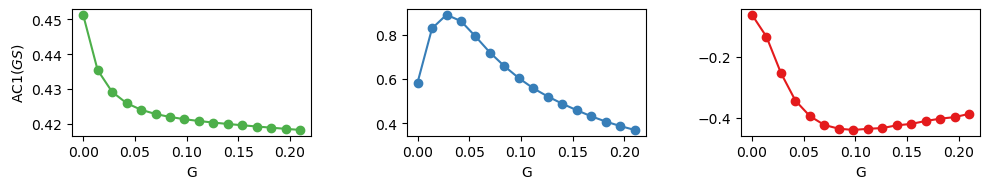

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(10, 2.), sharey=False)  # Disable shared y-axis
y_min = np.min(AC1_global)
y_max = np.max(AC1_global)
padding = 0.05 * (y_max - y_min)  # 5% padding
for subplot_idx in range(3):
    y_all = AC1_global[subplot_idx, :, :]  # Shape: (6, 16) for this subplot
    y_min = np.min(y_all)
    y_max = np.max(y_all)
    padding = 0.05 * (y_max - y_min)  # 5% padding

    for line_idx in range(len(DEL)):
        y_values = y_all[line_idx]
        axes[subplot_idx].plot(
            Gs,
            y_values,
            color=colors[subplot_idx],
            marker='o'
        )

    #axes[subplot_idx].set_title(f"{case[subplot_idx]}")
    axes[subplot_idx].set_xlabel("G")
    axes[subplot_idx].set_ylim(y_min - padding, y_max + padding)

    if subplot_idx == 0:
        axes[subplot_idx].set_ylabel(r"AC1($GS$)")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)  # More space between subplots
#plt.savefig('AC1_global.pdf', transparent=True, dpi=300)
plt.show()

# Local AC1 (autocorrelation at lag 1ms for each simulated brain region)

In [10]:
# I select the cortical ROIs
ROIsm=np.asarray(ROIs)[Cortical_labels]

In [11]:
ROIsm[24]

'Right Retrosplenial area, ventral part'

In [12]:
# number of regions
ids=np.arange(60)

In [17]:
global_connectivity_ids=np.arange(16)

# Your loop with retry mechanism
tlen=5000

AC1_local=np.zeros((3,len(ids),len(global_connectivity_ids)))

for idat, dat in enumerate(PATHS):
    print(idat)
    for iG in global_connectivity_ids:
        with open(path_data_simulated + dat + '/data_G%d.pkl' % iG, 'rb') as f:
            DATA = pickle.load(f)
            
        # Extract timeseries
        R = DATA['R'][tlen:, cortex_ids]  # Kuramoto parameter timeseries i.e., the local variable for each ROI
                
        for ienne, enne in enumerate(ids):
            AC1_local[idat,ienne,iG]= AC1(R[:,enne])

0
1
2


/var/folders/8j/xj5x54bs757dw9vt37nb69l40000gn/T/ipykernel_8570/3854783572.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(colormaps[subplot_idx])


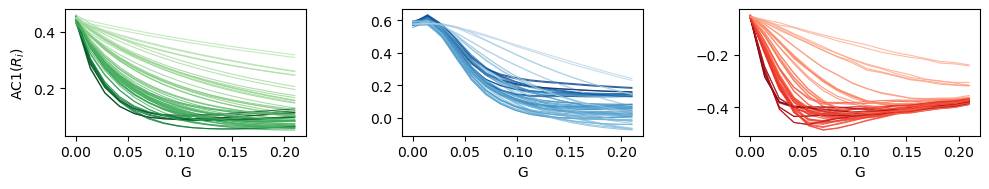

In [28]:
from matplotlib import cm

# This is the structural in-strength calculated from the cortical ROIs of the Allen Structural connectome (e.g., see notebook 1)
instrength=np.asarray([1.9737271 , 1.95601406, 0.70958593, 2.09403356, 1.71593984,
       1.05118705, 0.6982905 , 0.31607513, 1.9471671 , 1.17863418,
       4.40639357, 3.98180306, 3.62618341, 1.61131354, 2.08169054,
       2.44109073, 0.55446726, 0.86706295, 1.91923054, 3.53381901,
       3.38335554, 2.04937983, 1.50577545, 1.16548838, 2.03478647,
       2.16127293, 2.33737489, 0.2039825 , 0.45425794, 0.77431038,
       1.9737271 , 1.95601406, 0.70958593, 2.09403356, 1.71593984,
       1.05118705, 0.6982905 , 0.31607513, 1.9471671 , 1.17863418,
       4.40639357, 3.98180306, 3.62618341, 1.61131354, 2.08169054,
       2.44109073, 0.55446726, 0.86706295, 1.91923054, 3.53381901,
       3.38335554, 2.04937983, 1.50577545, 1.16548838, 2.03478647,
       2.16127293, 2.33737489, 0.2039825 , 0.45425794, 0.77431038])

instrength_norm = (instrength - instrength.min()) / (instrength.max() - instrength.min())  # normalize to [0, 1]
instrength_scaled = 0.3 + 0.7 * instrength_norm  # scale to [0.3, 1.0] to avoid too-light colors

fig, axes = plt.subplots(1, 3, figsize=(10, 2.), sharey=False)
colormaps = ['Greens', 'Blues', 'Reds']

for subplot_idx in range(3):
    y_all = AC1_local[subplot_idx, :, :]  # Shape: (n_nodes, n_Gs)
    y_min = np.min(y_all)
    y_max = np.max(y_all)
    padding = 0.05 * (y_max - y_min)
    
    cmap = cm.get_cmap(colormaps[subplot_idx])
    
    for line_idx in range(len(ids)):
        y_values = y_all[line_idx]
        color_val = cmap(instrength_scaled[line_idx])  # color based on instrength
        axes[subplot_idx].plot(
            Gs,
            y_values,
            color=color_val,
            alpha=0.8,
            linewidth=0.8
        )

    axes[subplot_idx].set_xlabel("G")
    axes[subplot_idx].set_ylim(y_min - padding, y_max + padding)

    if subplot_idx == 0:
        axes[subplot_idx].set_ylabel(r"AC1($R_i$)")

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
#plt.savefig('AC1_local.pdf', transparent=True, dpi=300)
plt.show()



# Local AC1 vs in-strength vs local metastability (i.e., var(R))

In [18]:
global_connectivity_ids=np.arange(16)

# Your loop with retry mechanism
tlen=5000

Meta_local=np.zeros((3,len(ids),len(global_connectivity_ids)))

for idat, dat in enumerate(PATHS):
    print(idat)
    for iG in global_connectivity_ids:
        with open(path_data_simulated + dat + '/data_G%d.pkl' % iG, 'rb') as f:
            DATA = pickle.load(f)
            
        # Extract timeseries
        R = DATA['R'][tlen:, cortex_ids]  # Kuramoto parameter timeseries i.e., the local variable for each ROI
                
        for ienne, enne in enumerate(ids):
            Meta_local[idat,ienne,iG]= np.var(R[:,enne])

0
1
2


/var/folders/8j/xj5x54bs757dw9vt37nb69l40000gn/T/ipykernel_8570/2843035625.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  Set1 = cm.get_cmap('Set1')
/var/folders/8j/xj5x54bs757dw9vt37nb69l40000gn/T/ipykernel_8570/2843035625.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(colormaps[subplot_idx])


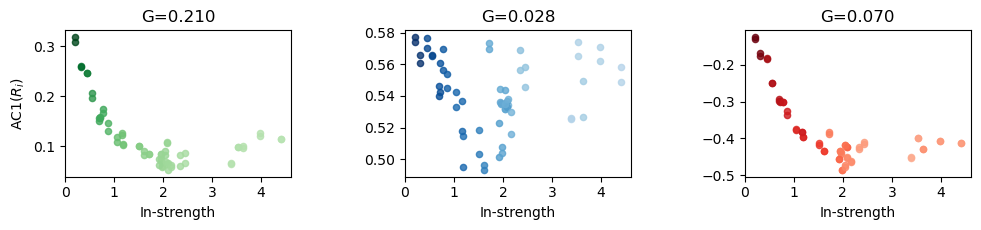

In [29]:
import matplotlib.cm as cm
Set1 = cm.get_cmap('Set1')
colors = [Set1(2),Set1(1),Set1(0)]


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Gip=0

gadd=[15,2, 5]

fig, axes = plt.subplots(1, 3, figsize=(10, 2.4), sharey=False)  # Disable shared y-axis

colormaps = ['Greens', 'Blues', 'Reds']

for subplot_idx in range(3):
    # Extract AC1 values for G=0 and G=working_point
    #ac1_g0 = AC1_local[subplot_idx, :, 0]
    ac1_g3 = AC1_local[subplot_idx, :, Gip+gadd[subplot_idx]]

    # Compute ΔAC1
    delta_ac1 = (ac1_g3)# - ac1_g0) / ac1_g0

    x_values = instrength

    # Pearson correlation
    r, p = pearsonr(x_values, delta_ac1)

    # Metastability normalization
    metastab_at_G=Meta_local[subplot_idx,:,Gip+gadd[subplot_idx]]
    metastab_at_G_norm = (metastab_at_G - metastab_at_G.min()) / (metastab_at_G.max() - metastab_at_G.min())  # normalize to [0, 1]
    metastab_at_G_scaled = 0.3 + 0.7 * metastab_at_G_norm  # scale to [0.3, 1.0] to avoid too-light colors

    cmap = cm.get_cmap(colormaps[subplot_idx])
    
    # Plot scatter
    for i in range(len(ids)):
        color_val = cmap(metastab_at_G_scaled[i])  # color based on metastability for each region
        axes[subplot_idx].scatter(
            x_values[i], delta_ac1[i],
            color=color_val,
            s=20,
            alpha=0.8
        )
    
    # Choose annotation position to avoid data overlap
    # Default position: top-right, but move if it's crowded
    if subplot_idx == 2:
        text_pos = (0.95, 0.95)  # move to top-left in subplot 3
    elif r > 0:
        text_pos = (0.95, 0.95)  # top-left if positively correlated
    else:
        text_pos = (0.95, 0.95)  # top-right otherwise
    
    # axes[subplot_idx].text(
    #     *text_pos,
    #     f"r = {r:.2f}",
    #     transform=axes[subplot_idx].transAxes,
    #     ha='left' if text_pos[0] < 0.5 else 'right',
    #     va='top',
    #     fontsize=9,
    #     color='black'
    # )


    # Custom y-limits with padding
    y_min, y_max = np.min(delta_ac1), np.max(delta_ac1)
    padding = 0.05 * (y_max - y_min) if y_max != y_min else 0.1
    axes[subplot_idx].set_ylim(y_min - padding, y_max + padding)

    #axes[subplot_idx].set_title(f"{case[subplot_idx]}")
    axes[subplot_idx].set_title(r'G=%.3f'%Gs[Gip+gadd[subplot_idx]])
    axes[subplot_idx].set_xlabel("In-strength")
    axes[subplot_idx].axhline(0, color='gray', linewidth=0.5, linestyle='--')

    if subplot_idx == 0:
        axes[subplot_idx].set_ylabel(r"AC1($R_i$)")#$\Delta$

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
#plt.savefig('AC1_vs_instrength.pdf', transparent=True, dpi=300)
plt.show()



# Local Avalanches

In [32]:
from scipy.signal import butter, filtfilt, welch

# Constants
global_connectivity_ids = np.arange(16)
tlen = 5000
fs = 2000  # Sampling rate in Hz
#lowcut, highcut = 0.5, 100.0  # Bandpass filter bounds

# Prepare outputs
AC1_local = np.zeros((3, len(ids), len(global_connectivity_ids)))
SS_local = {}
PSD_local = {}  # To store PSDs

# Design bandpass filter once
#b, a = butter(N=4, Wn=[lowcut, highcut], btype='band', fs=fs)

for idat, dat in enumerate(PATHS):
    print(idat)
    SS_local[idat] = {}
    PSD_local[idat] = {}

    for iG in global_connectivity_ids:
        with open(path_data_simulated + dat + f'/data_G{iG}.pkl', 'rb') as f:
            DATA = pickle.load(f)

        # Extract timeseries
        R = DATA['R'][tlen:, cortex_ids]  # Shape: (T, N)
        SS_local[idat][iG] = {}
        PSD_local[idat][iG] = {}

        for ienne, enne in enumerate(ids):
            signal_raw = R[:, enne]

            # AC1 and Range
            AC1_local[idat, ienne, iG] = AC1(signal_raw)

            # Avalanche extraction
            SS_local[idat][iG][ienne], dur = measure_events(
                np.abs(signal_raw),
                np.median(np.abs(signal_raw)),
                dir=-1
            )

            # --- PSD calculation ---
            # Filter the signal
            #signal_filt = filtfilt(b, a, signal_raw)

            # Compute PSD using Welch
            freqs, psd = welch(signal_raw, fs=fs, nperseg=2048)

            # Store PSD: you can choose to keep both freqs and psd, or just psd
            PSD_local[idat][iG][ienne] = (freqs, psd)


0
1
2


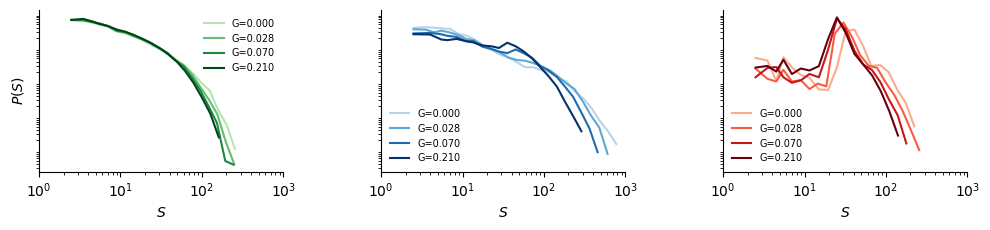

In [33]:
GGs = [0, 2, 5, 15]
Gs_labels = [f'G=%.3f'%Gs[g] for g in GGs]  # Labels like G=0.0, G=0.3, ...

fig, axes = plt.subplots(1, 3, figsize=(10, 2.4), sharey=True)

colormaps = ['Greens', 'Blues', 'Reds']
x_min, x_max = 1e0, 1e3  # Common x-limits

for i in range(3):
    for spine in ['top', 'right']:
        axes[i].spines[spine].set_visible(False)

    cmap = plt.get_cmap(colormaps[i])
    n_colors = len(GGs)

    # Avoid lightest colors by sampling from 0.3 to 1.0
    shades = [cmap(0.3 + 0.7 * j / (n_colors - 1)) for j in range(n_colors)]

    for j, g in enumerate(GGs):
        fx.plot_pdf(SS_local[i][j][24], ax=axes[i], color=shades[j], label=Gs_labels[j])

    #axes[i].set_title(f"{case[i]}")
    axes[i].set_xlabel(r"$S$")
    axes[i].set_yscale("log")
    axes[i].set_xscale("log")
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_yticks([])

    if i == 0:
        axes[i].set_ylabel(r"$P(S)$")

    axes[i].legend(fontsize=7, frameon=False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
#plt.savefig('../figures/Fig3/Local_Sizes_powerlaw.pdf', transparent=True, dpi=300)
plt.show()

# Local PSD

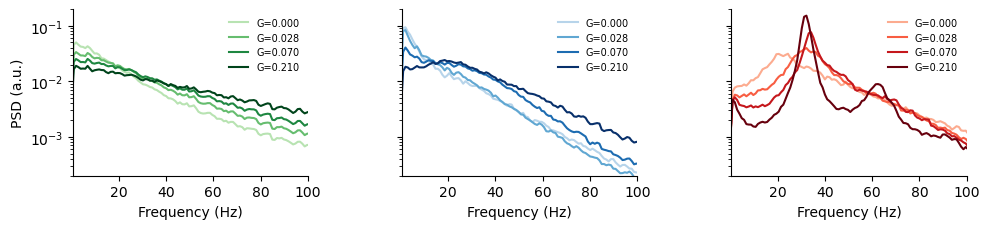

In [34]:
GGs = [0, 2, 5, 15]
Gs_labels = ['G=%.3f'%Gs[g] for g in GGs]

fig, axes = plt.subplots(1, 3, figsize=(10, 2.4), sharey=True)

colormaps = ['Greens', 'Blues', 'Reds']
x_min, x_max = 0.5, 100  # Frequency range of interest

for i in range(3):  # loop over datasets
    for spine in ['top', 'right']:
        axes[i].spines[spine].set_visible(False)

    cmap = plt.get_cmap(colormaps[i])
    n_colors = len(GGs)
    shades = [cmap(0.3 + 0.7 * j / (n_colors - 1)) for j in range(n_colors)]

    for j, g in enumerate(GGs):

        freqs, psd = PSD_local[i][g][24]
        
        # Normalize (choose one of the following)
        psd /= np.trapz(psd, freqs)   # Option 1: area-based
        # psd /= psd.max()            # Option 2: max-based
        
        axes[i].plot(freqs, psd, color=shades[j], label=Gs_labels[j])


    #axes[i].set_title(f"{case[i]}")
    axes[i].set_xlabel("Frequency (Hz)")
    #axes[i].set_xscale("log")
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(2*1e-4, 0.2)
    axes[i].set_yscale("log")
    #axes[i].set_yticks([])

    if i == 0:
        axes[i].set_ylabel("PSD (a.u.)")

    axes[i].legend(fontsize=7, frameon=False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
#plt.savefig('../figures/Fig3/Local_PSD.pdf', transparent=True, dpi=300)
plt.show()
